# PART - B

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the weather dataset
data = pd.read_csv('Weather Data and Air Quality Index of Chittagong.csv')
data.head()

,year,month,day,tempHigh,tempAvg,tempLow,DPHigh,DPAvg,DPLow,humidityHigh,...,humidityLow,SLPHigh,SLPAvg,SLPLow,visibilityHigh,visibilityAvg,visibilityLow,windAvg,Rainfall,AQI
0,2014,1,3,26,21,15,15,14,12,83,...,42,1017,1015,1013,4,4,3,10,0.0,182.0
1,2014,1,4,26,20,15,16,14,12,83,...,46,1016,1013,1011,4,3,2,16,0.0,131.0
2,2014,1,5,24,19,13,15,14,13,88,...,50,1014,1011,1010,3,2,2,10,0.0,140.0
3,2014,1,6,24,18,13,15,13,11,94,...,44,1014,1013,1011,4,3,1,8,0.0,99.0
4,2014,1,7,26,20,14,17,13,11,91,...,29,1017,1014,1013,4,3,1,8,0.0,87.0


## Exploratory Data Analysis

In [3]:
# Dataset size
data.shape

(1275, 21)

In [4]:
# Checking for missing data
data.isnull().sum()

year              0
month             0
day               0
tempHigh          0
tempAvg           0
tempLow           0
DPHigh            0
DPAvg             0
DPLow             0
humidityHigh      0
humidityAvg       0
humidityLow       0
SLPHigh           0
SLPAvg            0
SLPLow            0
visibilityHigh    0
visibilityAvg     0
visibilityLow     0
windAvg           0
Rainfall          0
AQI               0
dtype: int64

In [5]:
colNames = list(data.columns)
colNames = colNames[3:] #creating a list with column names to which Outlier detection is to be carried out

### Outlier detection

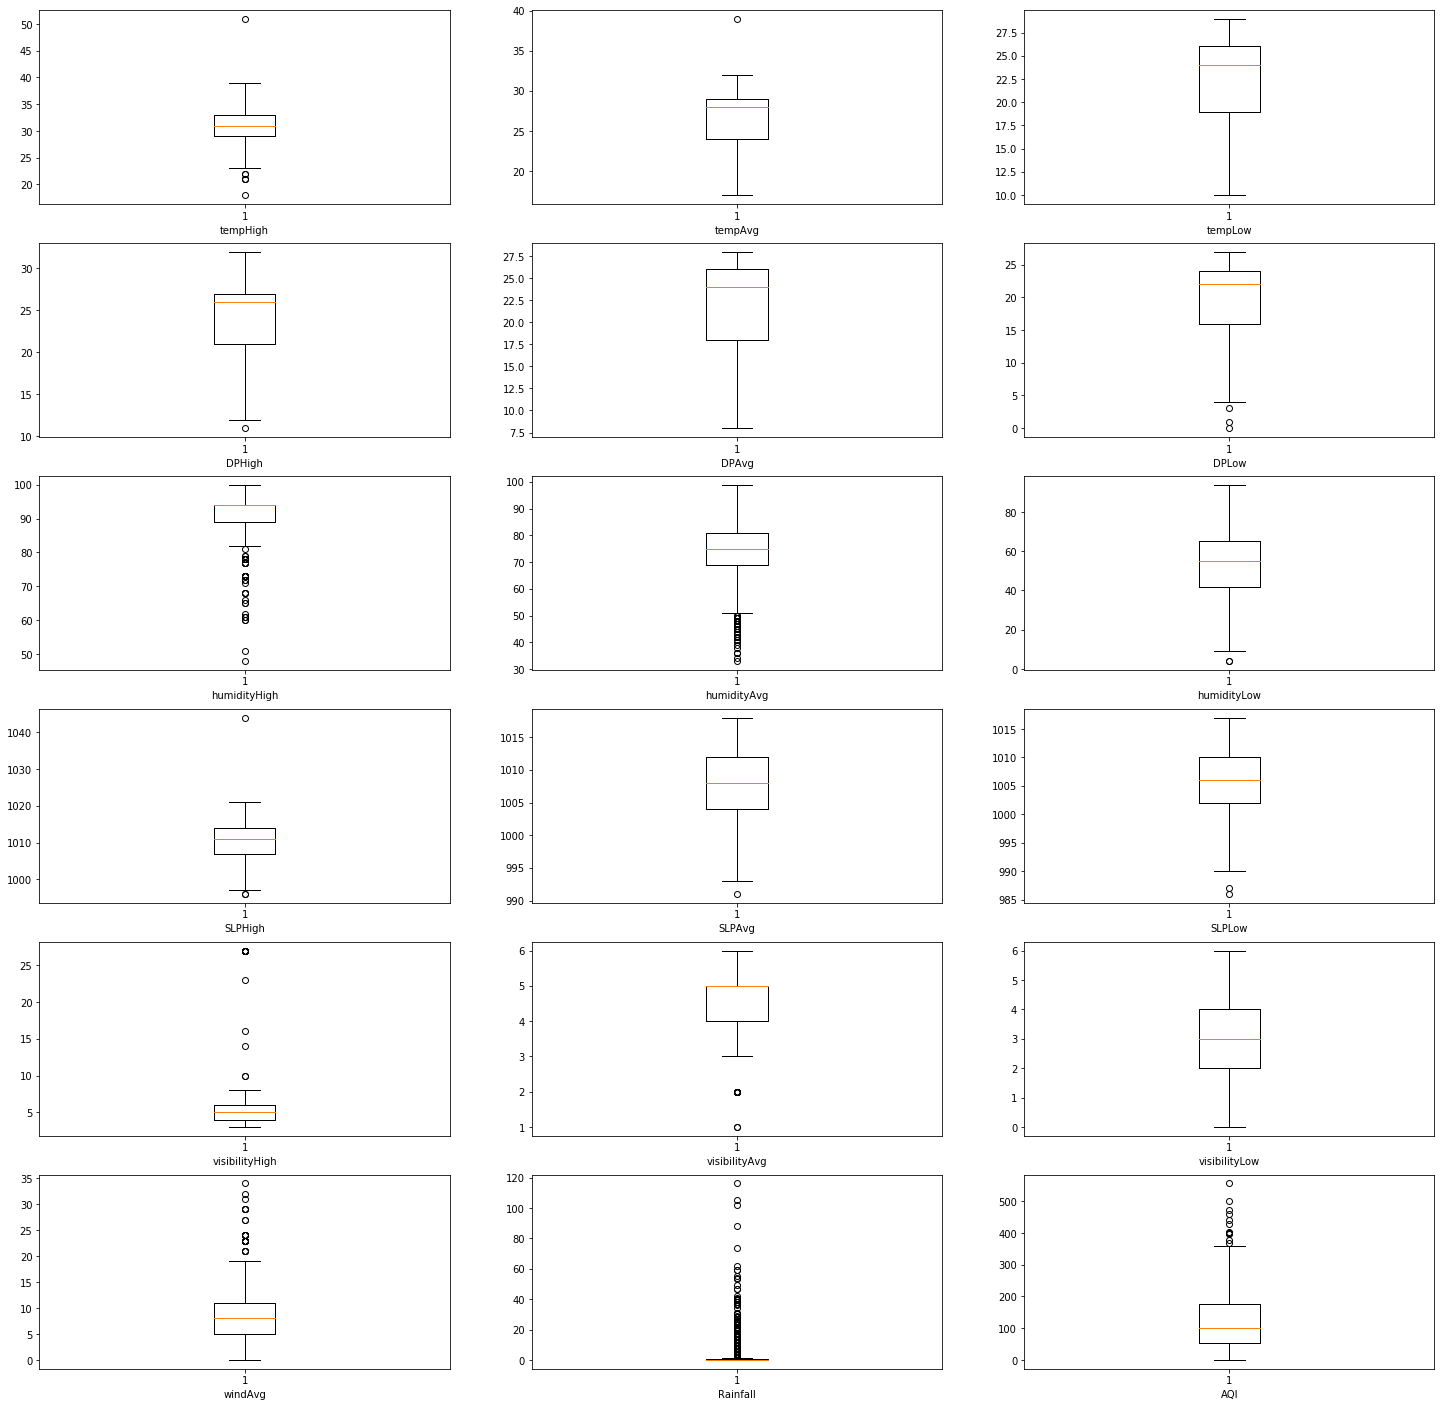

In [6]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 25))
counter = 0
for i in range(6):
    for j in range(3):

        ax = axes[i][j]
        ax.boxplot(data[data.columns[counter+3]])
        ax.set_xlabel(colNames[counter])
        counter += 1

plt.show()

### Distribution of Data

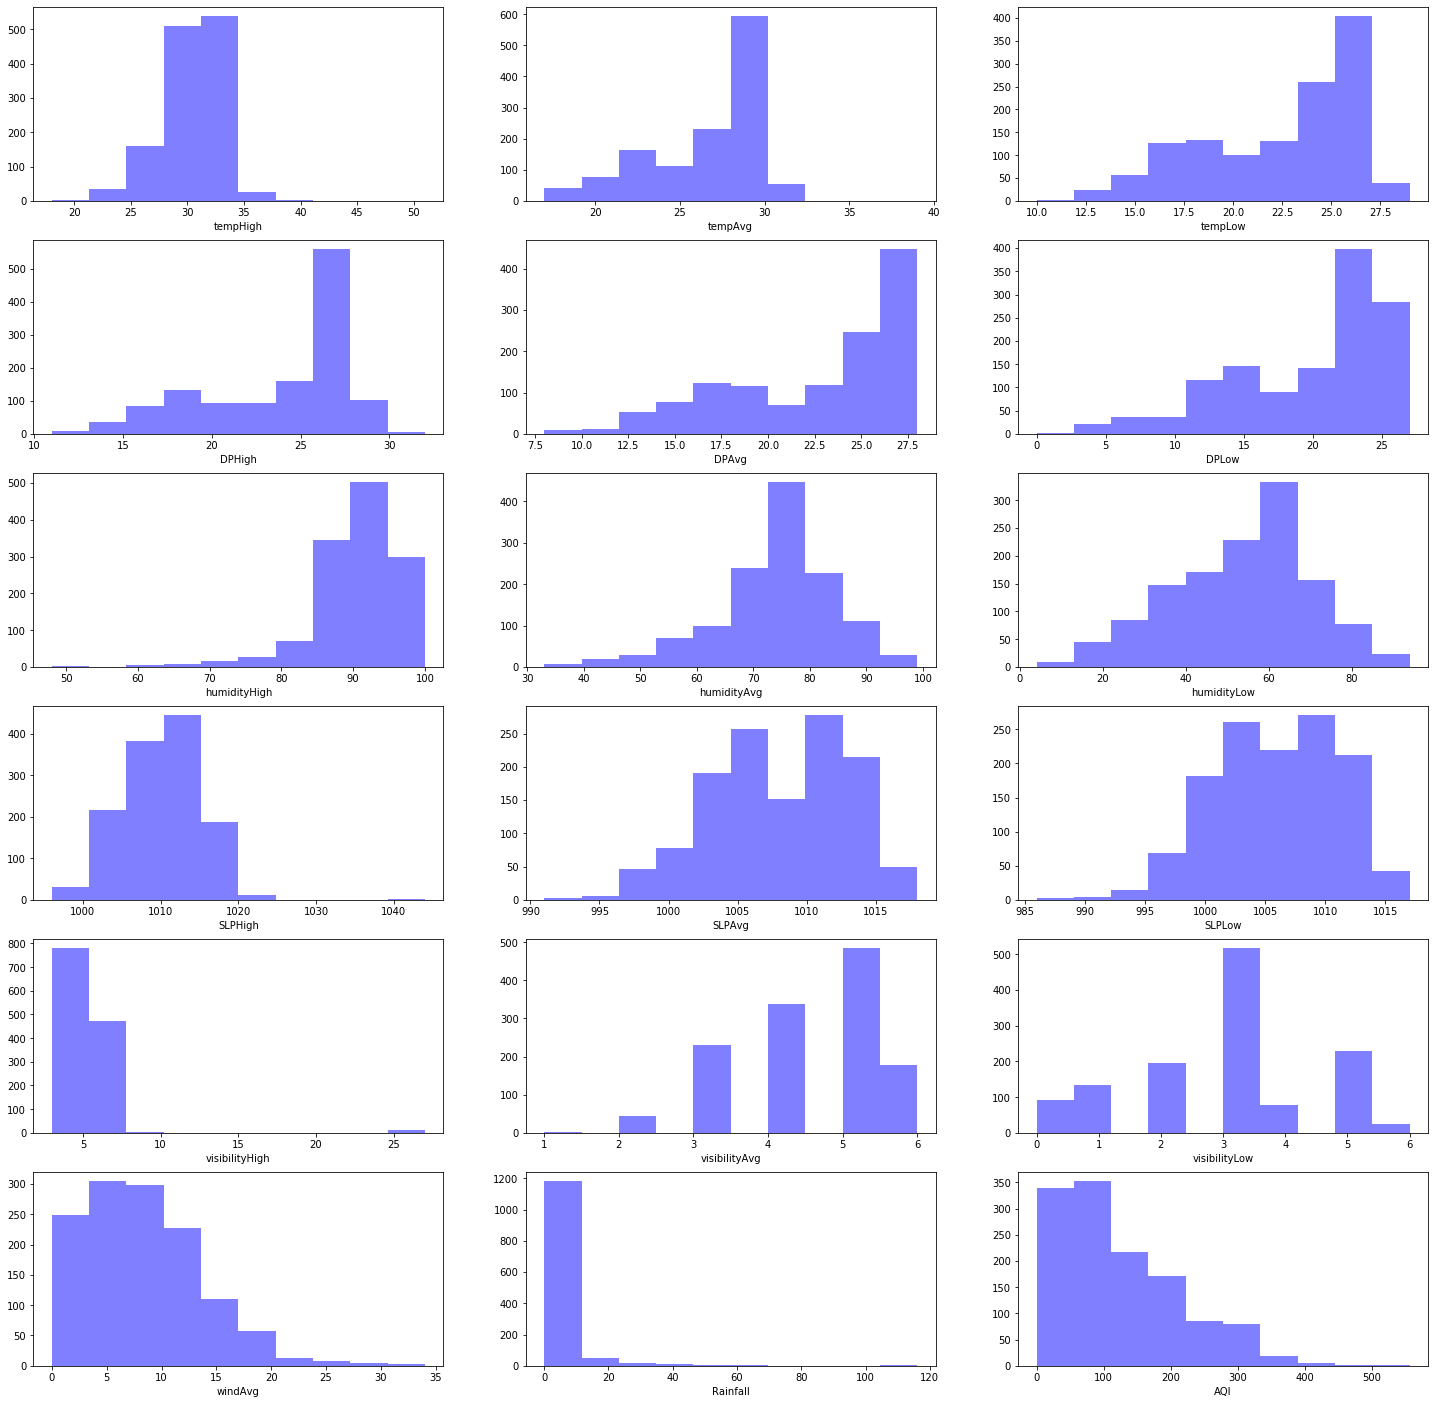

In [7]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25, 25))
counter = 0
for i in range(6):
    for j in range(3):

        ax = axes[i][j]
        ax.hist(data[data.columns[counter+3]], color='blue', alpha=0.5, label='{}'.format(data.columns[counter]))
        ax.set_xlabel(colNames[counter])
        counter += 1

plt.show()

### Correlation analysis

In [8]:
heat = data[["tempAvg","DPAvg","humidityAvg","SLPAvg","visibilityAvg","windAvg","Rainfall","AQI"]]
corrMatrix = heat.corr()

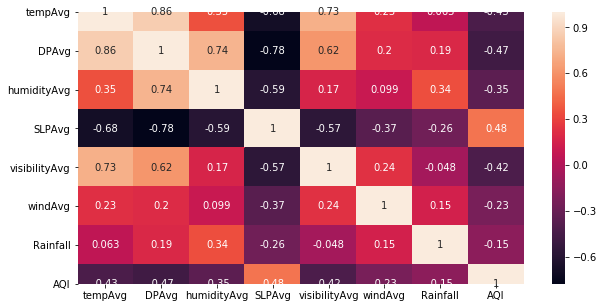

In [9]:
import seaborn as sns
plt.figure(1,figsize=(10,5))
sns.heatmap(corrMatrix,annot=True)
plt.show()

### EDA Results

- There are no missing values in the dataset.
- There are outliers in the dataset that needs to be considered while training models. This can be inferenced from the boxplot, Eg,. In 'tempHigh' feature everything below 24 and above 40 can be considered as outliers.
- Data is not properly distributed and is skewed except humidityAvg which follows normal distribution.
- From the heatmap, we can see that some features have strong linear relationship with other features while some have weak linear relationship with other features. Eg,. Rainfall is weakly correlated with other features while tempAvg is strongly correlated with DPAvg,SLPAvg, and visibilityAvg.

## Classification

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data preprocessing
# changing Rainfall attribute into Binary class
data['Rainfall'] = np.where(data['Rainfall'] > 0,1,0)
X = data.drop(columns=['Rainfall','year','month','day'])  # Features
y = data['Rainfall']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features -> Transforms data such that mean = 0 and SD = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Sigmoid function is chosen due to binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=37, batch_size=32, verbose=1) # Number of epochs is chosen through trial and error

# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype('int32')  # Convert probabilities to binary predictions

# Calculate accuracy and other performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Epoch 1/37
32/32 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7520
Epoch 2/37
32/32 [==============================] - 0s 1ms/step - loss: 0.4178 - accuracy: 0.8059
Epoch 3/37
32/32 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8059
Epoch 4/37
32/32 [==============================] - 0s 1ms/step - loss: 0.3792 - accuracy: 0.8255
Epoch 5/37
32/32 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8186
Epoch 6/37
32/32 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8255
Epoch 7/37
32/32 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8225
Epoch 8/37
32/32 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8265
Epoch 9/37
32/32 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8216
Epoch 10/37
32/32 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8314
Epoch 11/37
32/32 [

#### Preprocessing done (1):
- One hot encoding is done for feature 'Rainfall'
- Feature extraction is done
- Data is splitted into training and testing sets
- Features are standardized

#### Choice of target attribute and ML model (2):
- Target attribute chosen is 'Rainfall'. This attribute is chosen to classify whether the city of chittagong would receive rainfall or not in a particular day given the necessary inputs.
- This is a binary classification.
- Artificial Neural Network (ANN) is chosen for classification as the dataset contains outliers, Rainfall has weak linear relationship with other features and data is skewed. ANN helps to find non-linear relationship in the dataset with target attribute and independent attributes, it can also deal with outliers to give better results than other algorithms.

#### Quality of ML model (3):
- Evaluation metrics used and why it is used:
    - Accuracy:
        * Importance: Accuracy is a straightforward metric that measures the overall correctness of the model's predictions. It tells you the percentage of correctly classified instances.
        * Use Case: It is valuable when all classes have roughly equal importance, and you want a high-level overview of model performance.

    - Precision:
        * Importance: Precision is important when you want to minimize false positives. It measures the proportion of true positive predictions among all positive predictions.
        * Use Case: It is crucial in applications where false positives have significant consequences, such as medical diagnoses or fraud detection.

    - Recall (Sensitivity or True Positive Rate):
        * Importance: Recall is important when you want to minimize false negatives. It measures the proportion of true positive predictions among all actual positive instances.
        * Use Case: It is crucial in situations where missing positive cases can have serious consequences, like identifying rare diseases.

    - F1-Score:
        * Importance: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both false positives and false negatives.
        * Use Case: It is particularly useful when you want to strike a balance between precision and recall, considering both false positives and false negatives.

    - Support:
       * Importance: Support represents the number of actual occurrences of each class in the dataset. It provides context for interpreting precision and recall values.
       * Use Case: It helps identify imbalanced datasets and provides insight into how well the model generalizes across different classes.

    - Weighted Average (Weighted F1-Score):
       * Importance: In imbalanced datasets, where some classes have fewer instances than others, a weighted average of metrics (e.g., weighted F1-score) considers the class distribution and provides an overall performance measure.
       * Use Case: It is important when classes are imbalanced to prevent the model from being biased towards the majority class.
- Since, the dataset used is an imbalanced one, the overall performance of the model can be described using Weighted Average which is 81%. Thus, the model 'Quality' can be said to be GOOD.

### Predicting results for data provided by user

In [11]:
# Function to get user input for new data
def get_user_input():
    user_input = list(map(float,input("Enter values for the features: ").split()))

    # Convert the user input to a list of floats
    try:
        if len(user_input) != 17:
            raise ValueError("Please enter values for all seventeen features.")
    except ValueError as e:
        print(f"Invalid input. {e}")
        exit()

    # Make a prediction based on the user input
    user_input = np.array([user_input])  # Reshape the input as expected by the model
    return user_input

# Function to preprocess user input
def preprocess_user_input(user_input, mean, std):    
    # Standardize the user input using the same mean and std from training
    user_scaled = (user_input - mean) / std
    
    return user_scaled

In [13]:
# Getting user input
user_input = get_user_input()

# Preprocessing user input
user_input_scaled = preprocess_user_input(user_input, np.mean(X_train), np.std(X_train))

# Making predictions using the trained model
prediction = model.predict(user_input_scaled)

# Converting the prediction to a binary result (e.g., 0 or 1)
binary_prediction = (prediction > 0.5).astype('int32')

# Displaying the prediction
if binary_prediction[0] == 1:
    print("Predicted value: Raining")
else:
    print("Predicted value: Not raining")
print('Actual value: Raining')

Enter values for the features: 30 26 22 25 19 15 96 64 35 1014 1008 1006 6 5 3 8 185
Predicted value: Not raining
Actual value: Raining


#### Observation (4):
- Model is sensitive to both False Positives and False Negatives.
- Needs further improvement before it can accurately predict rainfall in Chittagong. Adding more data in class 'Raining (1)' to dataset and training the model can increase its performance significantly.

## Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Data preprocessing
X = data.drop(columns=['tempAvg','tempHigh','tempLow'])
y = data['tempAvg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.7748794099904461
R-squared: 0.9216839138127609


#### Preprocessing done (1):
- Feature extraction is done
- Data is splitted into training and testing sets
- There are no extreme outliers that needs to be handled

#### Choice of target attribute and ML model (2):
- Target attribute chosen is 'tempAvg'. This attribute is chosen to predict the temperature observed in the city of chittagong given the necessary inputs.
- No regularization type is used as regularization techniques provided worser results than simple multi-linear regression. Simple Multi-linear regression without any regularization technique is chosen because
    - With small dataset, multi-linear regression performs better because regularization methods like Ridge or Lasso may not have enough data to effectively learn the regularization parameters.
    - Multi-linear regression can be sensitive to outliers, especially if they have a significant impact on the regression line. However, if the outliers are not extreme and the majority of the data follows a linear trend, multi-linear regression might still provide reasonable results.

#### Quality of ML model (3):
- The model has a high level of predictive power. It can make reasonably accurate predictions for the target variable based on the independent variables.
- There is a strong correlation between the predictors and the target variable. The predictors are providing valuable information about the target.
- Evaluation metrics used and why it is used:
    - MSE (Mean Squared Error):
        * Error Magnitude: MSE calculates the average squared difference between the predicted and actual values. It penalizes large errors more heavily.
        * Loss Function: In many regression models, MSE serves as the loss function to be minimized during training. Minimizing MSE during model training helps the model learn optimal parameters.
        * Interpretability: MSE values are in the same units as the target variable, making it easy to interpret. Lower MSE indicates better model performance.
    - R-squared (R²):
        * Goodness of Fit: R² quantifies how well the model explains the variability in the data. It measures the proportion of the variance in the target variable that is explained by the independent variables.
        * Baseline Comparison: R² provides a benchmark for model performance. A higher R² value indicates a better fit to the data compared to a model with a lower R² value.
        * Interpretability: R² is interpretable as the percentage of variance explained. An R² of 0 means the model doesn't explain any variance, while an R² of 1 means the model perfectly explains all variance.
- An R-squared value of 0.92 suggests that the model fits the data quite well. It means that approximately 92% of the variability in the target variable is explained by the predictors in your model.

### Predicting results for data provided by user

In [16]:
# Getting user input
user_input = input("Enter values for the features: ")

# Convert the user input to a list of floats
try:
    user_input = [float(val) for val in user_input.split()]
    if len(user_input) != 18:
        raise ValueError("Please enter values for all eighteen features.")
except ValueError as e:
    print(f"Invalid input. {e}")
    exit()

# Make a prediction based on the user input
user_input = np.array([user_input])  # Reshape the input as expected by the model
prediction = linear_model.predict(user_input)

print(f"Predicted value: {prediction[0]}")
print("Actual value: ",27)

Enter values for the features: 2014 4 5 26 24 21 89 78 62 1011 1009 1006 5 5 3 6 0 133
Predicted value: 27.492375499383826
Actual value:  27


#### Observation (4):
- The regression model performs really good and can almost accurately predict the temperature of chittagong when all the required inputs are given.

## Ensemble ML

In [17]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing
# changing Rainfall attribute into Binary class
data['Rainfall'] = np.where(data['Rainfall'] > 0,1,0)
X = data.drop(columns=['Rainfall','year','month','day'])  # Features
y = data['Rainfall']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f'Confusion Matrix:\n{conf_matrix}')
print("Classification Report:\n", report)

Accuracy: 0.8705882352941177
Confusion Matrix:
[[180   9]
 [ 24  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       189
           1       0.82      0.64      0.72        66

    accuracy                           0.87       255
   macro avg       0.85      0.79      0.82       255
weighted avg       0.87      0.87      0.86       255



#### Preprocessing done (1):
- One hot encoding is done for feature 'Rainfall'
- Feature extraction is done
- Data is splitted into training and testing sets
- There are no extreme outliers that needs to be handled

#### Choice of target attribute and ML model (2):
- Target attribute chosen is 'Rainfall'. This attribute is chosen to classify whether the city of chittagong would receive rainfall or not in a particular day given the necessary inputs.
- This is a binary classification.
- Random forest, an ensemble Machine Learning technique, is chosen because
    - Random Forest can handle imbalanced datasets and still provide meaningful predictions. This is important when dealing with small datasets with uneven class distributions.
    - Random Forest tends to overfit less on small datasets compared to individual decision trees. The ensemble nature of Random Forest, where multiple decision trees are combined, helps in reducing overfitting and improving generalization.
    - Random Forest is robust to noise and outliers. It can handle noisy data and outliers better than some other algorithms.
    - Random Forest can capture non-linear relationships in the data effectively, making it suitable for this dataset where the underlying patterns are not linear.

#### Quality of ML model (3):
- Quality of ML model when using random forest is significantly better than artificial neural networks (ANN), this can be seen when comparing the reports obtained from both models.
- Evaluation metrics used and why it is used:
    - Accuracy:
        * Importance: Accuracy is a straightforward metric that measures the overall correctness of the model's predictions. It tells you the percentage of correctly classified instances.
        * Use Case: It is valuable when all classes have roughly equal importance, and you want a high-level overview of model performance.

    - Precision:
        * Importance: Precision is important when you want to minimize false positives. It measures the proportion of true positive predictions among all positive predictions.
        * Use Case: It is crucial in applications where false positives have significant consequences, such as medical diagnoses or fraud detection.

    - Recall (Sensitivity or True Positive Rate):
        * Importance: Recall is important when you want to minimize false negatives. It measures the proportion of true positive predictions among all actual positive instances.
        * Use Case: It is crucial in situations where missing positive cases can have serious consequences, like identifying rare diseases.

    - F1-Score:
        * Importance: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of both false positives and false negatives.
        * Use Case: It is particularly useful when you want to strike a balance between precision and recall, considering both false positives and false negatives.

    - Support:
       * Importance: Support represents the number of actual occurrences of each class in the dataset. It provides context for interpreting precision and recall values.
       * Use Case: It helps identify imbalanced datasets and provides insight into how well the model generalizes across different classes.

    - Weighted Average (Weighted F1-Score):
       * Importance: In imbalanced datasets, where some classes have fewer instances than others, a weighted average of metrics (e.g., weighted F1-score) considers the class distribution and provides an overall performance measure.
       * Use Case: It is important when classes are imbalanced to prevent the model from being biased towards the majority class.
- The weighted Average of 86% shows that the model performs Great when the dataset provided is a balanced one. This can be achieved by adding more data to class 'Raining (1)'.

In [18]:
user_input = input("Enter values for the features: ")

# Convert the user input to a list of floats
try:
    user_input = [float(val) for val in user_input.split()]
    if len(user_input) != 17:
        raise ValueError("Please enter values for all seventeen features.")
except ValueError as e:
    print(f"Invalid input. {e}")
    exit()

# Make a prediction based on the user input
user_input = np.array([user_input])  # Reshape the input as expected by the model
prediction = rf_classifier.predict(user_input)

# Display the prediction
if prediction[0] == 1:
    print("Predicted value: Raining")
else:
    print("Predicted value: Not raining")
print("Actual value: Raining")

Enter values for the features: 30 26 22 25 19 15 96 64 35 1014 1008 1006 6 5 3 8 185
Predicted value: Raining
Actual value: Raining


#### Observation (4):
- Random forest model performs really good and can predict accurately the rainfall in chittagong most of the time. Although this model performs better than ANN, before applying this model to real world problems, more data must be added to balance the dataset and trained to further improve the performance of the model.